In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-crunch-round-1/sample_submission.csv
/kaggle/input/data-crunch-round-1/train.csv
/kaggle/input/data-crunch-round-1/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,1,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,1,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,1,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,1,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


In [3]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["kingdom"] = encoder.fit_transform(df[["kingdom"]])


In [4]:
df.head()


,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,0.0,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,1,4,1,1.0,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,1,4,1,2.0,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,1,4,1,3.0,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,1,4,1,4.0,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


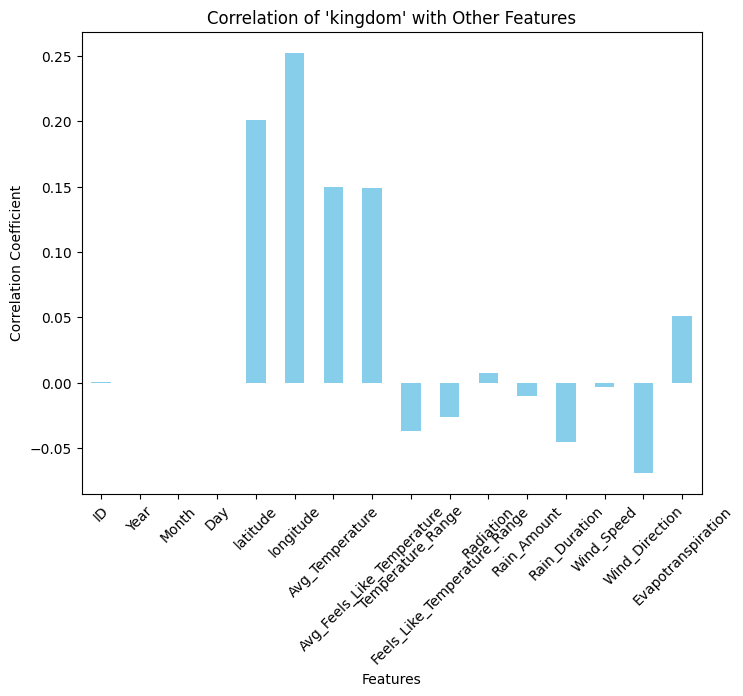

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of 'kingdom_encoded' with all other columns
kingdom_correlations = correlation_matrix["kingdom"]

# Plotting the correlation values with a bar plot
plt.figure(figsize=(8, 6))
kingdom_correlations.drop("kingdom").plot(kind="bar", color="skyblue")

# Adding labels and title
plt.title("Correlation of 'kingdom' with Other Features")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


In [6]:
correlation_matrix = df.corr()
print(correlation_matrix["kingdom"])


ID                              3.529111e-04
Year                            4.299427e-15
Month                           6.116732e-16
Day                             5.652471e-17
kingdom                         1.000000e+00
latitude                        2.008471e-01
longitude                       2.524770e-01
Avg_Temperature                 1.499371e-01
Avg_Feels_Like_Temperature      1.491144e-01
Temperature_Range              -3.688236e-02
Feels_Like_Temperature_Range   -2.645898e-02
Radiation                       7.337185e-03
Rain_Amount                    -9.863579e-03
Rain_Duration                  -4.536459e-02
Wind_Speed                     -2.977580e-03
Wind_Direction                 -6.886603e-02
Evapotranspiration              5.132245e-02
Name: kingdom, dtype: float64


In [7]:
correlation_matrix = df.corr()
print(correlation_matrix["latitude"])

ID                              7.088116e-05
Year                           -6.460581e-14
Month                          -3.384936e-15
Day                            -2.561776e-16
kingdom                         2.008471e-01
latitude                        1.000000e+00
longitude                       3.976139e-02
Avg_Temperature                -4.059243e-01
Avg_Feels_Like_Temperature     -4.080566e-01
Temperature_Range              -7.044042e-02
Feels_Like_Temperature_Range   -4.247734e-02
Radiation                       3.542322e-02
Rain_Amount                    -7.362994e-02
Rain_Duration                  -1.960869e-01
Wind_Speed                      3.126508e-01
Wind_Direction                 -1.299378e-01
Evapotranspiration              1.804831e-01
Name: latitude, dtype: float64


In [8]:
correlation_matrix = df.corr()
print(correlation_matrix["longitude"])

ID                              8.910193e-05
Year                            1.400680e-13
Month                           1.669967e-14
Day                             1.104212e-15
kingdom                         2.524770e-01
latitude                        3.976139e-02
longitude                       1.000000e+00
Avg_Temperature                -2.891116e-01
Avg_Feels_Like_Temperature     -2.911747e-01
Temperature_Range               1.557013e-01
Feels_Like_Temperature_Range    1.384283e-01
Radiation                       1.081040e-01
Rain_Amount                    -8.010353e-02
Rain_Duration                  -2.006671e-01
Wind_Speed                      3.157359e-02
Wind_Direction                 -7.875865e-02
Evapotranspiration              1.390225e-01
Name: longitude, dtype: float64


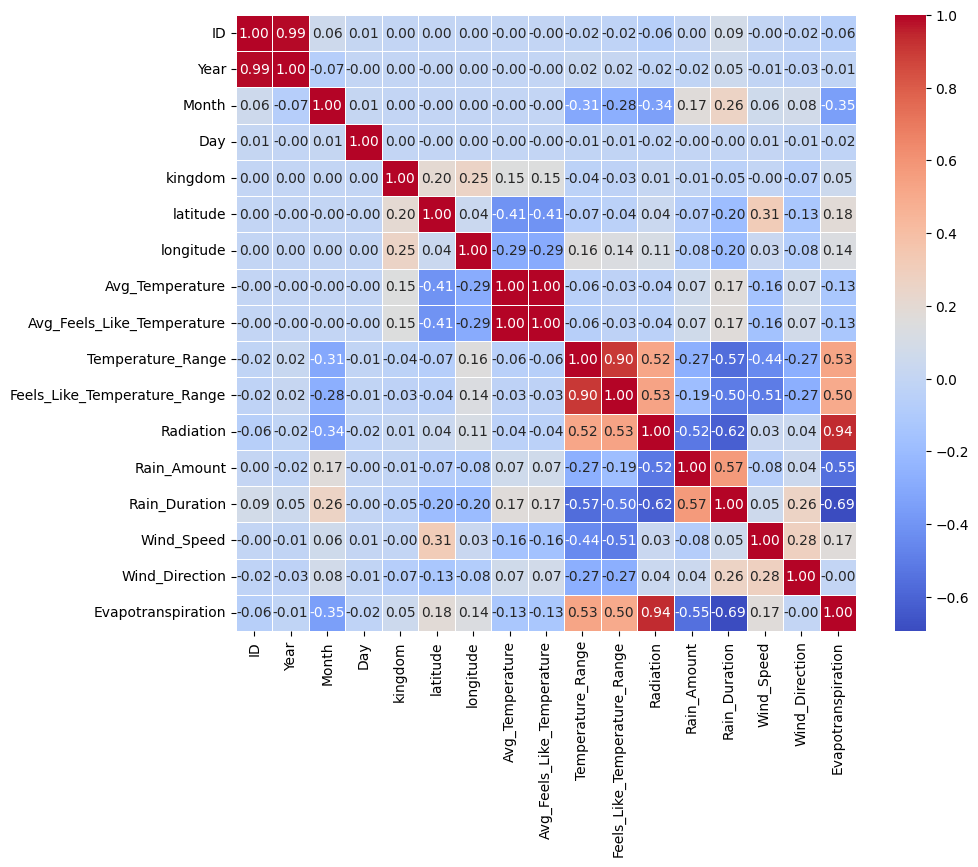

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()


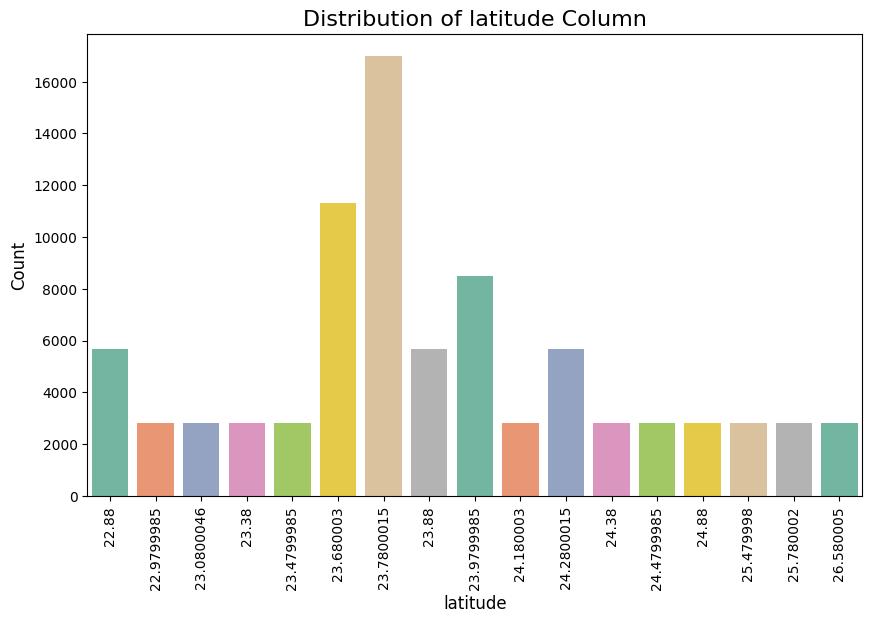

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='latitude', data=df, palette='Set2')

# Set labels and title
plt.title('Distribution of latitude Column', fontsize=16)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


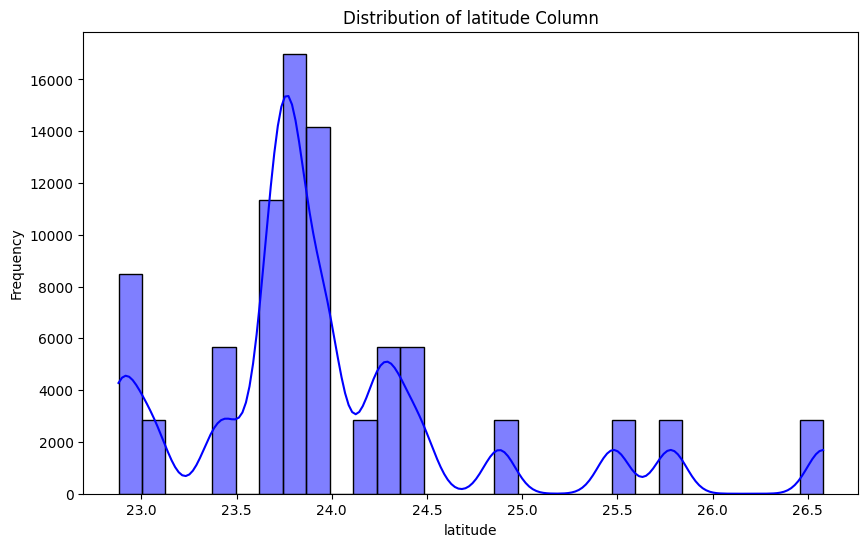

In [11]:
# Plotting histogram to see the distribution of 'kingdom' column
plt.figure(figsize=(10, 6))
sns.histplot(df['latitude'], kde=True, bins=30, color='blue')
plt.title('Distribution of latitude Column')
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.show()

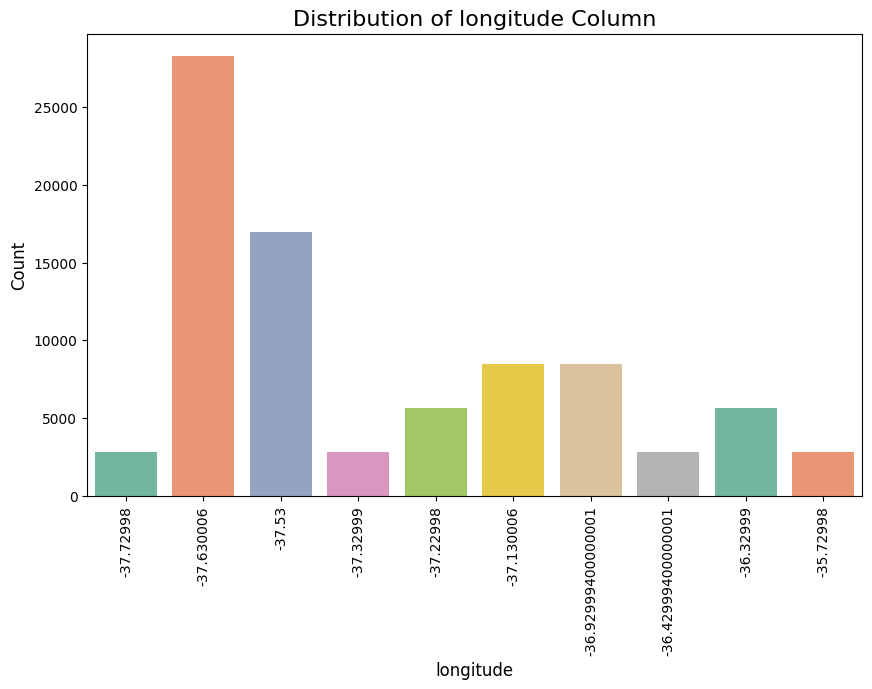

In [12]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='longitude', data=df, palette='Set2')

# Set labels and title
plt.title('Distribution of longitude Column', fontsize=16)
plt.xlabel('longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

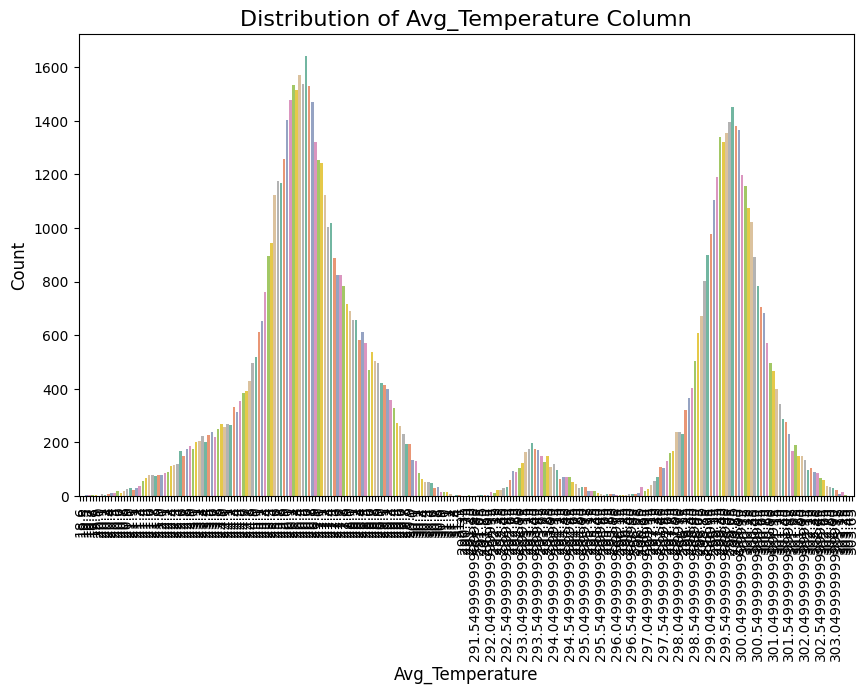

In [13]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Avg_Temperature', data=df, palette='Set2')

# Set labels and title
plt.title('Distribution of Avg_Temperature Column', fontsize=16)
plt.xlabel('Avg_Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

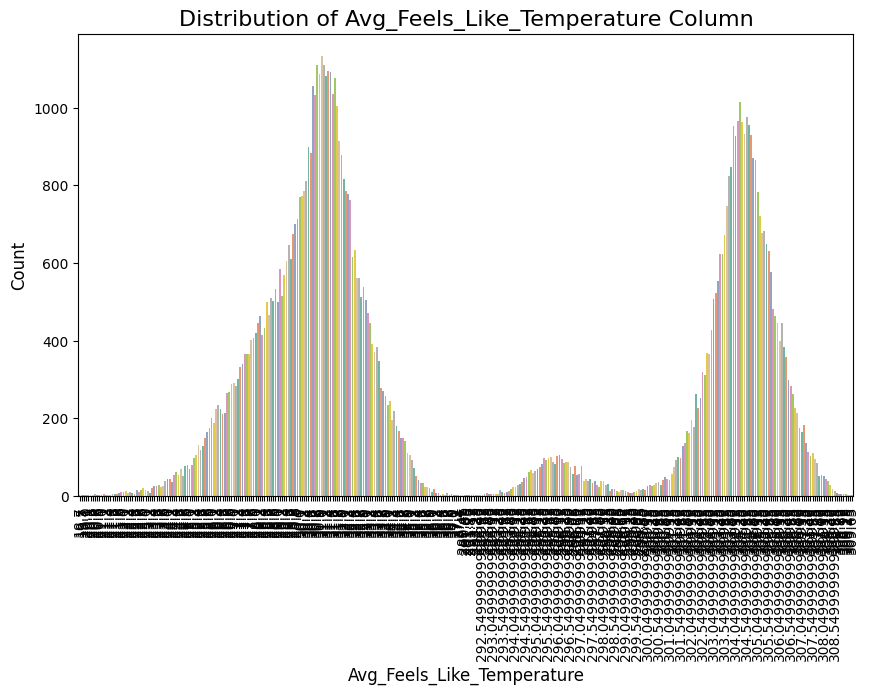

In [14]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Avg_Feels_Like_Temperature', data=df, palette='Set2')

# Set labels and title
plt.title('Distribution of Avg_Feels_Like_Temperature Column', fontsize=16)
plt.xlabel('Avg_Feels_Like_Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

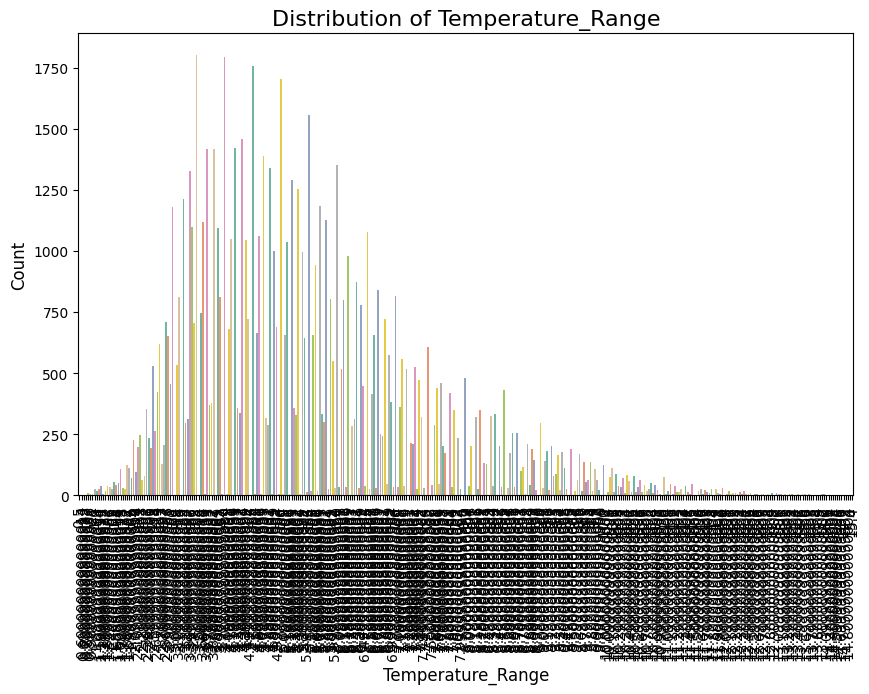

In [15]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Temperature_Range', data=df, palette='Set2') 	

# Set labels and title
plt.title('Distribution of Temperature_Range', fontsize=16)
plt.xlabel('Temperature_Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

In [16]:
df.head()


,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,0.0,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,1,4,1,1.0,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,1,4,1,2.0,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,1,4,1,3.0,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,1,4,1,4.0,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


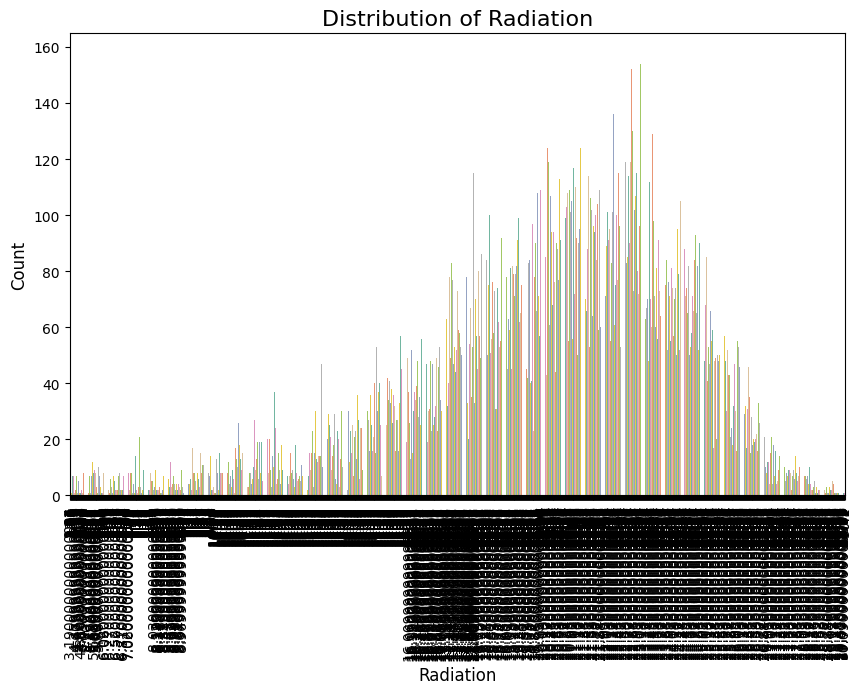

In [17]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Radiation', data=df, palette='Set2') 	

# Set labels and title
plt.title('Distribution of Radiation', fontsize=16)
plt.xlabel('Radiation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

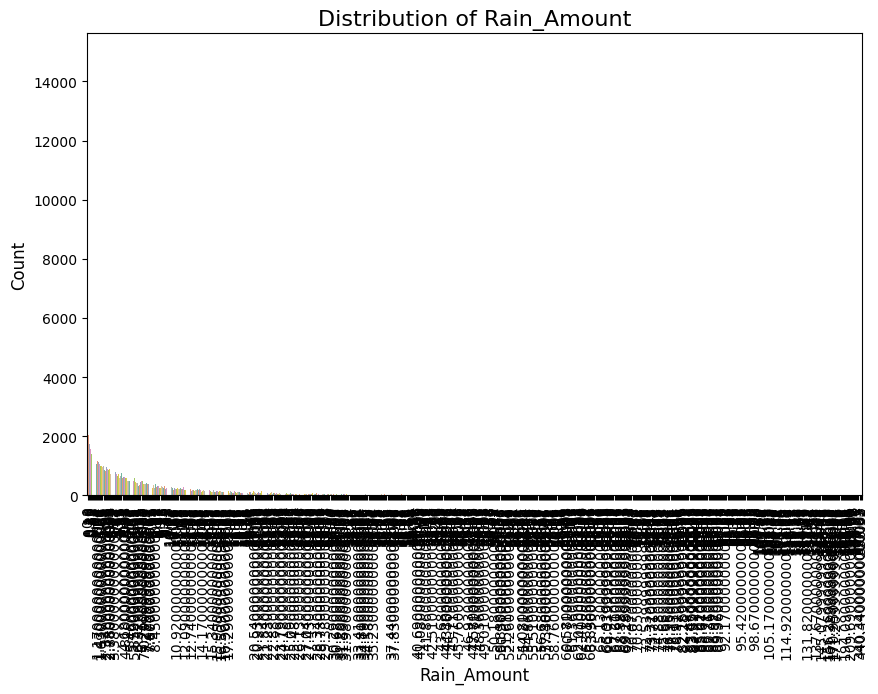

In [18]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Rain_Amount', data=df, palette='Set2') 	

# Set labels and title
plt.title('Distribution of Rain_Amount', fontsize=16)
plt.xlabel('Rain_Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

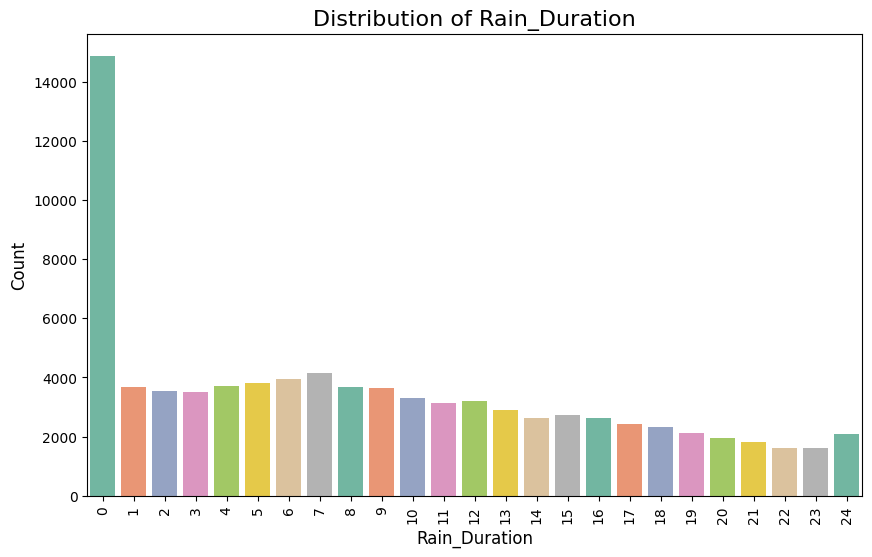

In [19]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Rain_Duration', data=df, palette='Set2') 	

# Set labels and title
plt.title('Distribution of Rain_Duration', fontsize=16)
plt.xlabel('Rain_Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

In [20]:

# Step 1: Calculate Q1, Q3, and IQR for 'Rain_Duration'
Q1 = df['Rain_Duration'].quantile(0.25)
Q3 = df['Rain_Duration'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Handle outliers by capping them (optional: you can also remove them)
df['Rain_Duration'] = df['Rain_Duration'].clip(lower=lower_bound, upper=upper_bound)

# To check the result
print(df['Rain_Duration'].describe())


count    84960.000000
mean         8.895680
std          7.231531
min          0.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         24.000000
Name: Rain_Duration, dtype: float64


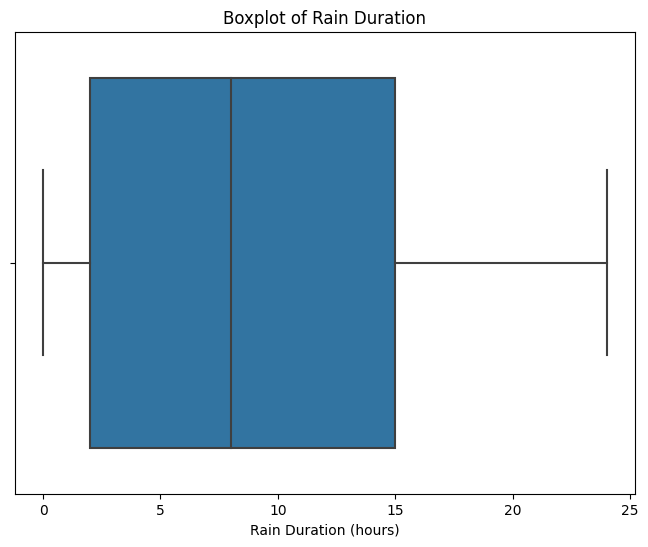

In [21]:
# Create a boxplot for the 'Rain_Duration' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rain_Duration'])
plt.title('Boxplot of Rain Duration')
plt.xlabel('Rain Duration (hours)')
plt.show()

In [22]:
print(df['Rain_Duration'].head())


0    16
1    12
2    12
3    16
4     8
Name: Rain_Duration, dtype: int64


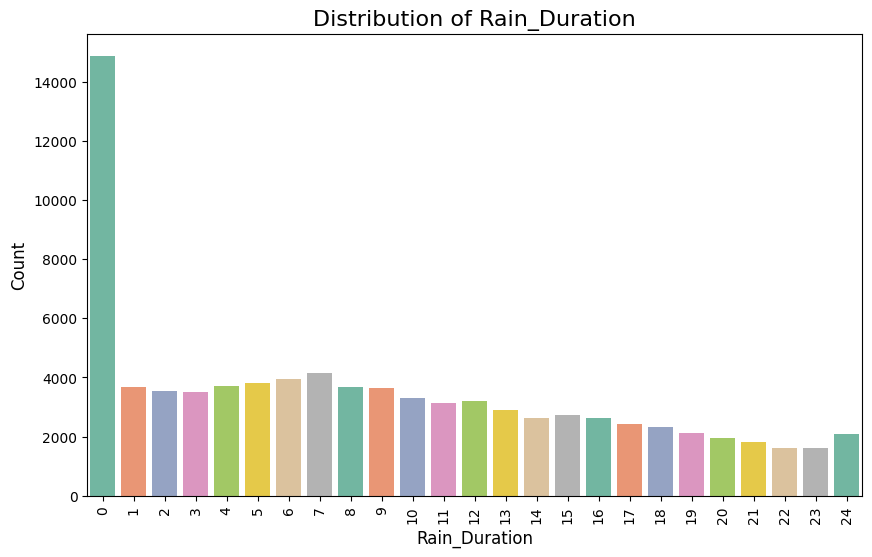

In [23]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Rain_Duration', data=df, palette='Set2') 	

# Set labels and title
plt.title('Distribution of Rain_Duration', fontsize=16)
plt.xlabel('Rain_Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

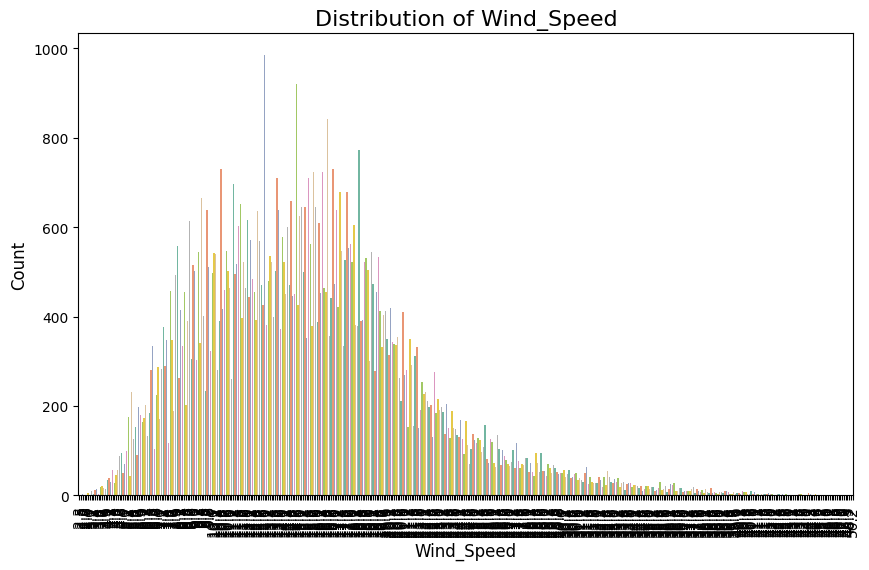

In [24]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Wind_Speed', data=df, palette='Set2')

# Set labels and title Wind_Direction
plt.title('Distribution of Wind_Speed', fontsize=16)
plt.xlabel('Wind_Speed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

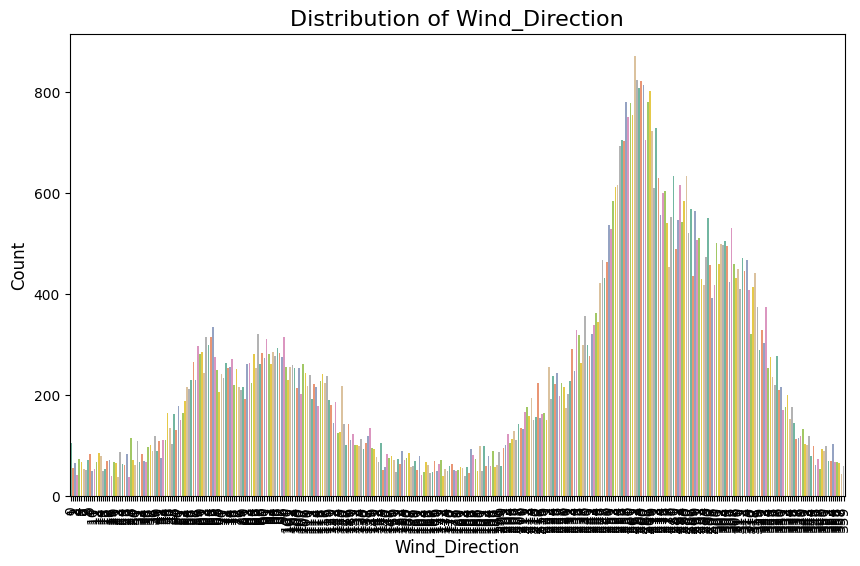

In [25]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Wind_Direction', data=df, palette='Set2')

# Set labels and title  
plt.title('Distribution of Wind_Direction', fontsize=16)
plt.xlabel('Wind_Direction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

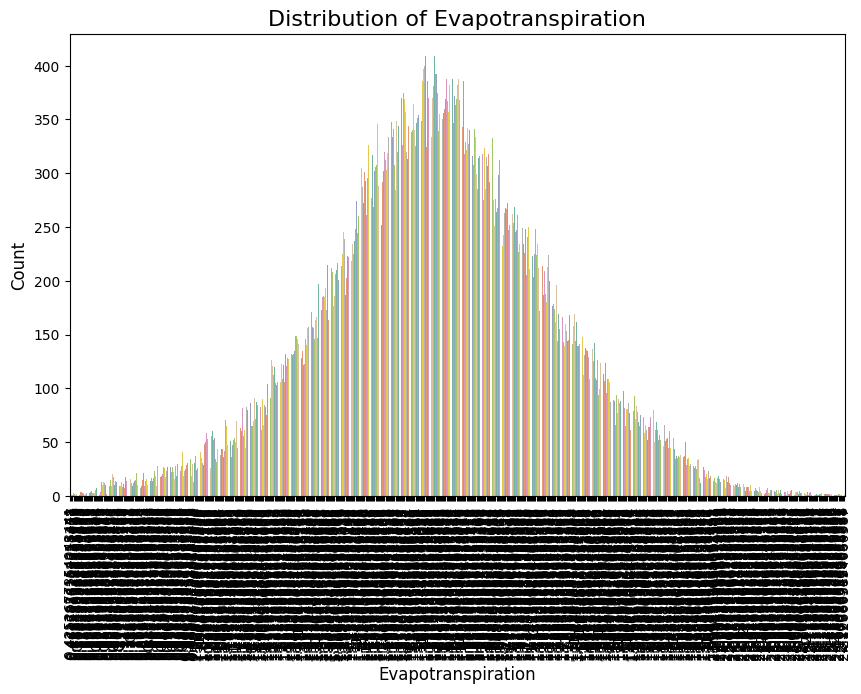

In [26]:
# Plot the distribution of the 'kingdom' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Evapotranspiration', data=df, palette='Set2')

# Set labels and title  
plt.title('Distribution of Evapotranspiration', fontsize=16)
plt.xlabel('Evapotranspiration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns that need scaling
num_cols = ['Avg_Temperature','Avg_Feels_Like_Temperature','Feels_Like_Temperature_Range','Temperature_Range','Radiation', 'Rain_Amount','Rain_Duration', 'Wind_Speed', 'Wind_Direction','Evapotranspiration','longitude','latitude']

# Create a transformer for numerical scaling
scaler = MinMaxScaler()

# Apply scaling only to the numerical features
df_scaled = df.copy()

# Fit and transform only the numerical columns
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Now, you can use X_train_scaled for training your model


In [28]:
df_scaled.head()


,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,0.0,0.378378,0.250000,0.024206,0.040557,0.536913,0.575758,0.718320,0.133707,0.666667,0.131524,0.788301,0.684456
1,2,1,4,1,1.0,0.027027,0.199995,0.985967,0.984533,0.362416,0.448485,0.726124,0.026860,0.500000,0.281837,0.448468,0.647774
2,3,1,4,1,2.0,0.000000,0.299987,0.027013,0.043994,0.315436,0.339394,0.726124,0.026860,0.500000,0.281837,0.448468,0.653489
3,4,1,4,1,3.0,0.351352,0.399993,0.018944,0.033339,0.516779,0.600000,0.723894,0.170897,0.666667,0.085595,0.963788,0.679050
4,5,1,4,1,4.0,0.783783,0.099990,0.032977,0.048462,0.348993,0.569697,0.712003,0.010921,0.333333,0.300626,0.515320,0.723915


In [29]:
# To see unique values and their order in the 'Month' column
unique_months = df_scaled['Month'].unique()
print(unique_months)


[ 4  5  6  7  8  9 10 11 12  1  2  3]


In [30]:
# Sorting the months (if it's not already sorted)
sorted_months = sorted(df_scaled['Month'].unique())
print(sorted_months)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [31]:
# Print unique values for 'Year', 'Month', and 'Day' columns
print("Unique values in 'Year' column:")
print(df_scaled['Year'].unique())

print("\nUnique values in 'Month' column:")
print(df_scaled['Month'].unique())

print("\nUnique values in 'Day' column:")
print(df_scaled['Day'].unique())

Unique values in 'Year' column:
[1 2 3 4 5 6 7 8]

Unique values in 'Month' column:
[ 4  5  6  7  8  9 10 11 12  1  2  3]

Unique values in 'Day' column:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [32]:
# To see unique values and their order in the 'Month' column
unique_months = df_scaled['Month'].unique()
print(unique_months)


[ 4  5  6  7  8  9 10 11 12  1  2  3]


In [33]:
df_scaled.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,0.0,0.378378,0.250000,0.024206,0.040557,0.536913,0.575758,0.718320,0.133707,0.666667,0.131524,0.788301,0.684456
1,2,1,4,1,1.0,0.027027,0.199995,0.985967,0.984533,0.362416,0.448485,0.726124,0.026860,0.500000,0.281837,0.448468,0.647774
2,3,1,4,1,2.0,0.000000,0.299987,0.027013,0.043994,0.315436,0.339394,0.726124,0.026860,0.500000,0.281837,0.448468,0.653489
3,4,1,4,1,3.0,0.351352,0.399993,0.018944,0.033339,0.516779,0.600000,0.723894,0.170897,0.666667,0.085595,0.963788,0.679050
4,5,1,4,1,4.0,0.783783,0.099990,0.032977,0.048462,0.348993,0.569697,0.712003,0.010921,0.333333,0.300626,0.515320,0.723915


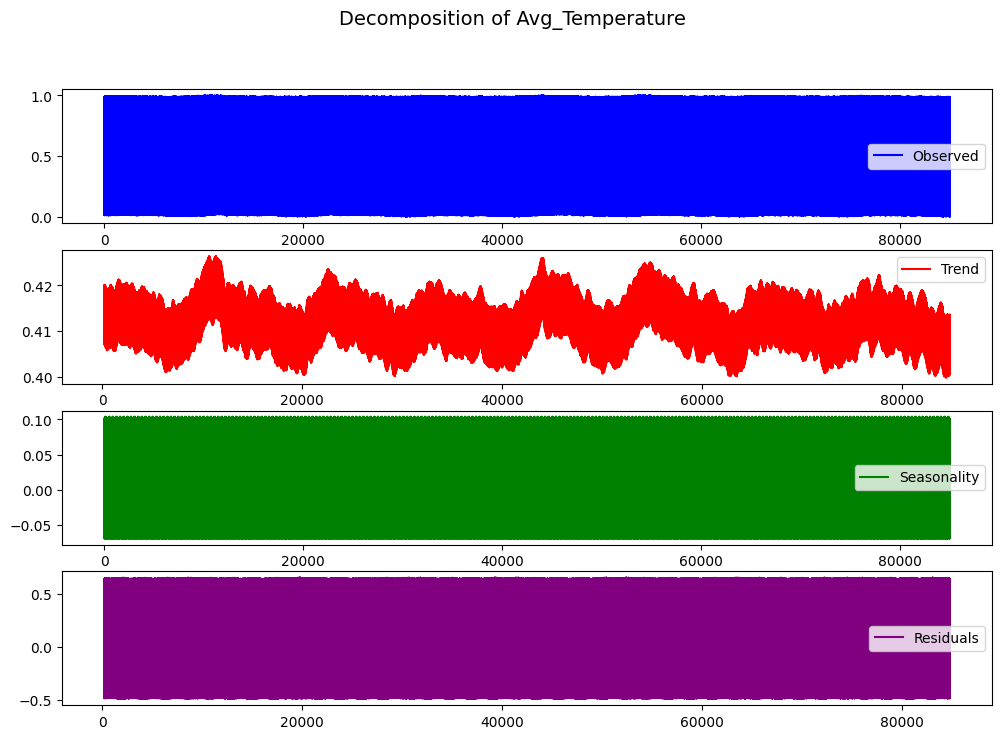

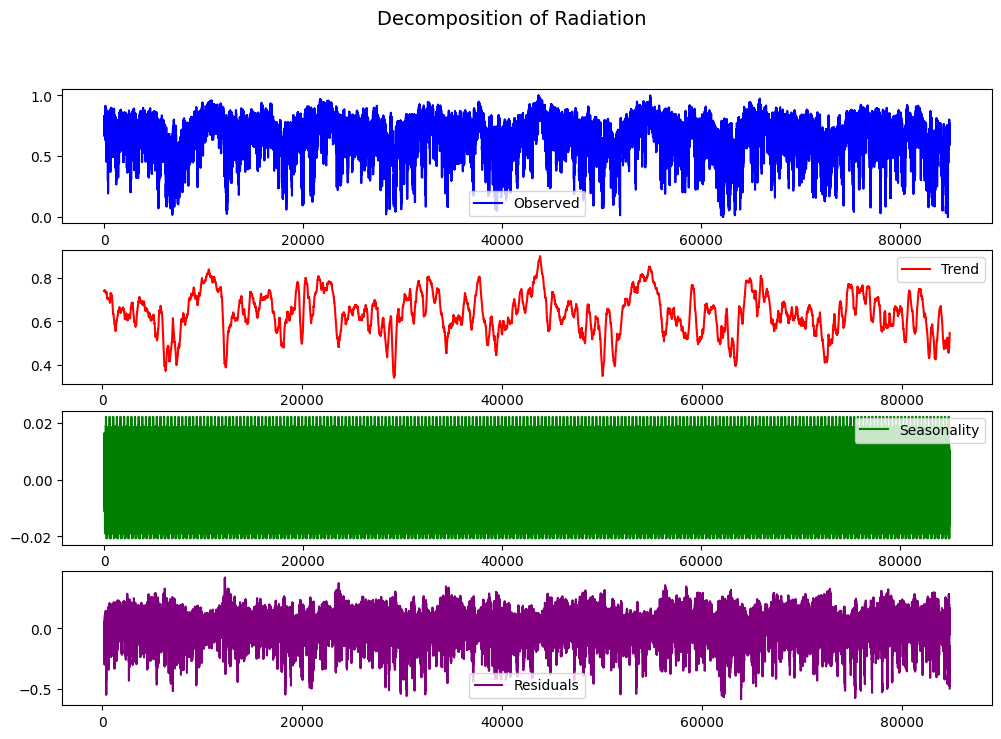

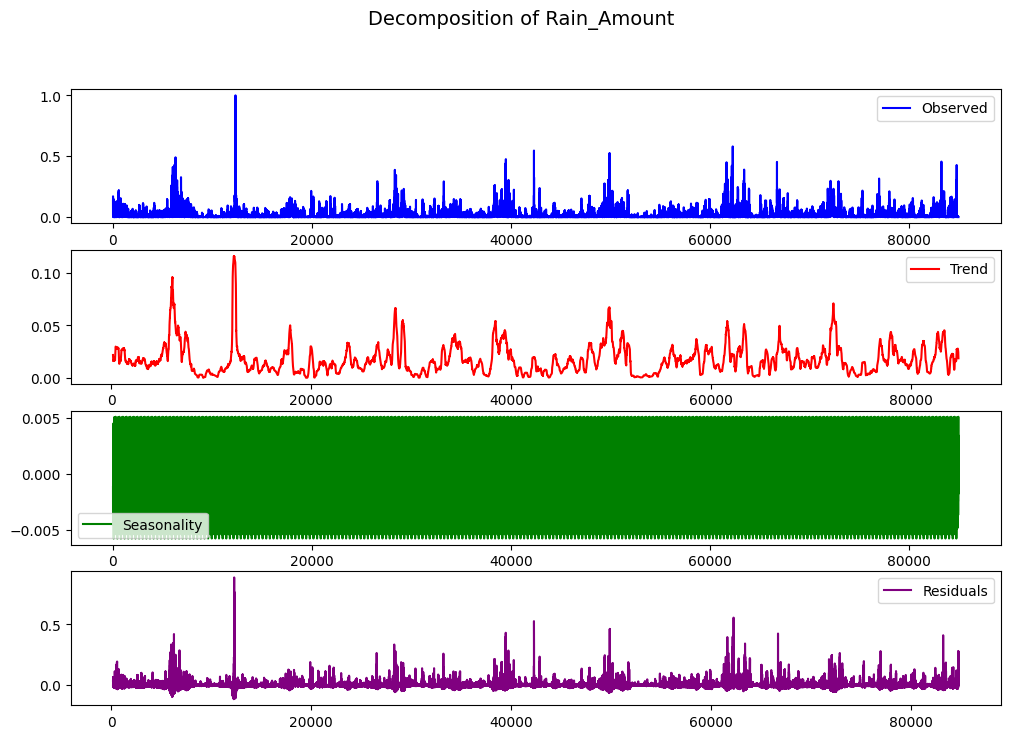

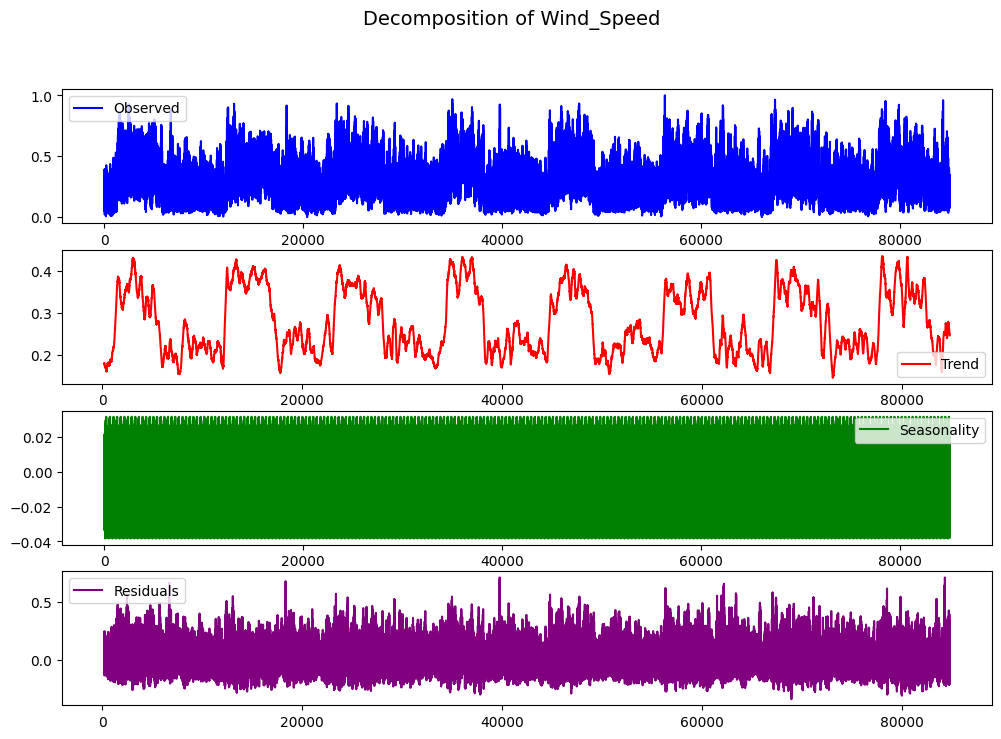

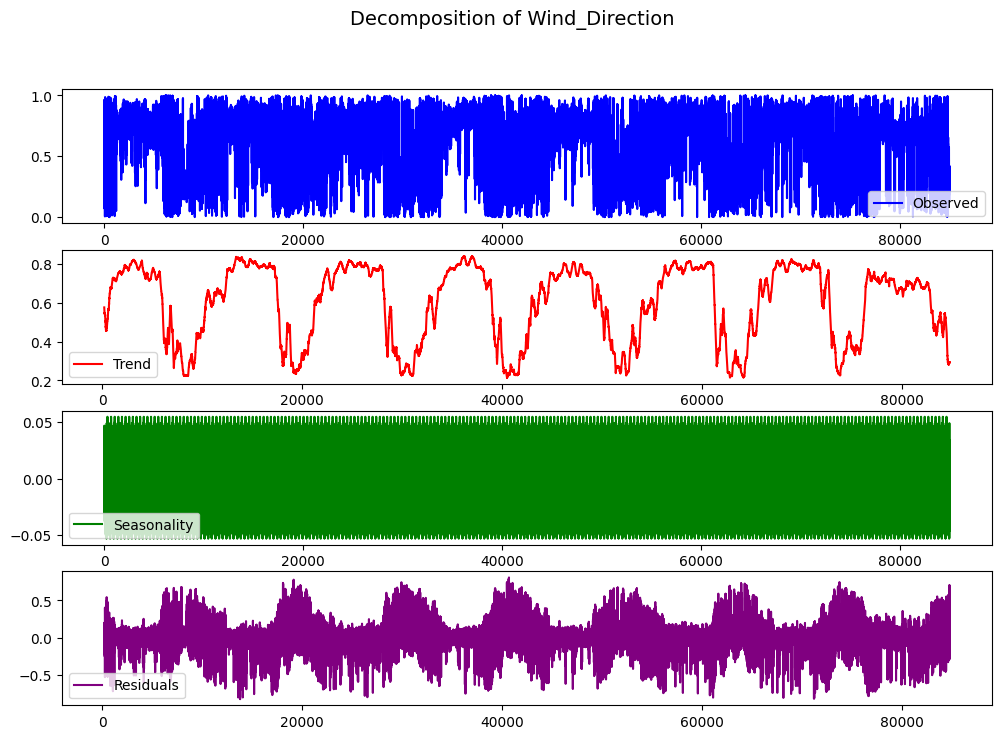

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Target variables to decompose
target_vars = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Perform decomposition for each target variable
for var in target_vars:
    decomposition = seasonal_decompose(df_scaled[var], period=365, model='additive')  # Adjust period based on seasonality

    # Plot the decomposition
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Decomposition of {var}", fontsize=14)

    plt.subplot(4, 1, 1)
    plt.plot(decomposition.observed, label="Observed", color='blue')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label="Trend", color='red')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label="Seasonality", color='green')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label="Residuals", color='purple')
    plt.legend()

    plt.show()
# Sort data by time before splitting (ensures correct order)
df_scaled = df_scaled.sort_values(by=['Year', 'Month', 'Day'])

# Define split index (80% train, 20% test)
split_idx = int(len(df_scaled) * 0.8)

# Training Data
train_data = df_scaled.iloc[:split_idx]

# Testing Data
test_data = df_scaled.iloc[split_idx:]


In [35]:
# Sort data by time before splitting (ensures correct order)
df_scaled = df_scaled.sort_values(by=['Year', 'Month', 'Day'])

# Define split index (80% train, 20% test)
split_idx = int(len(df_scaled) * 0.8)

# Training Data
train_data = df_scaled.iloc[:split_idx]

# Testing Data
test_data = df_scaled.iloc[split_idx:]


In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Features (X) - Independent Variables
feature_cols = ['Year', 'Month', 'Day', 'kingdom','latitude','longitude', 'Evapotranspiration']
X_train = train_data[feature_cols].values
X_test = test_data[feature_cols].values

# Target Variables (y) - Dependent Variables
target_cols = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']
y_train = train_data[target_cols].values
y_test = test_data[target_cols].values

# Reshape into 3D format for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Adding timestep = 1
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [59]:
df_scaled.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,0.0,0.378378,0.250000,0.024206,0.040557,0.536913,0.575758,0.718320,0.133707,0.666667,0.131524,0.788301,0.684456
1,2,1,4,1,1.0,0.027027,0.199995,0.985967,0.984533,0.362416,0.448485,0.726124,0.026860,0.500000,0.281837,0.448468,0.647774
2,3,1,4,1,2.0,0.000000,0.299987,0.027013,0.043994,0.315436,0.339394,0.726124,0.026860,0.500000,0.281837,0.448468,0.653489
3,4,1,4,1,3.0,0.351352,0.399993,0.018944,0.033339,0.516779,0.600000,0.723894,0.170897,0.666667,0.085595,0.963788,0.679050
4,5,1,4,1,4.0,0.783783,0.099990,0.032977,0.048462,0.348993,0.569697,0.712003,0.010921,0.333333,0.300626,0.515320,0.723915


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(len(target_cols))  # Output layer with 5 units (one for each target variable)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1693 - val_loss: 0.1219
Epoch 2/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1150 - val_loss: 0.1142
Epoch 3/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1093 - val_loss: 0.1136
Epoch 4/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1064 - val_loss: 0.1128
Epoch 5/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1039 - val_loss: 0.1135
Epoch 6/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1023 - val_loss: 0.1111
Epoch 7/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1007 - val_loss: 0.1112
Epoch 8/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0979 - val_loss: 0.1049
Epoch 9/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0938 - val_loss: 0.0994
Epoch 10/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0918 - val_loss: 0.0986
Epoch 11/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0902 - val_loss: 0.0988
Epoch 12/50
2124/2124 ━━━━━━━━━━━━━━━━━━━

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test)


531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [65]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you used MinMaxScaler to scale target variables
scaler_y = MinMaxScaler()
scaler_y.fit(train_data[target_cols])  # Fit on training data only

# Inverse transform predictions and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# Calculate R² Score
r2 = r2_score(y_test_original, y_pred_original)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.06942902114479503
Root Mean Squared Error (RMSE): 0.14184035456601302
R² Score: 0.5790772570094452


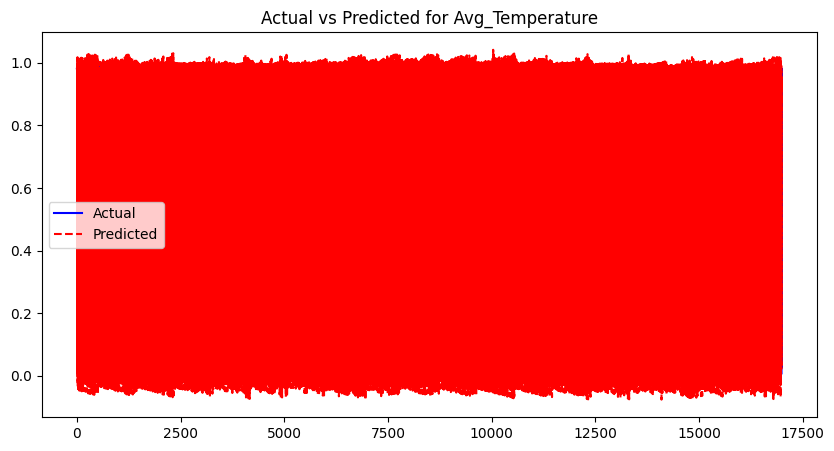

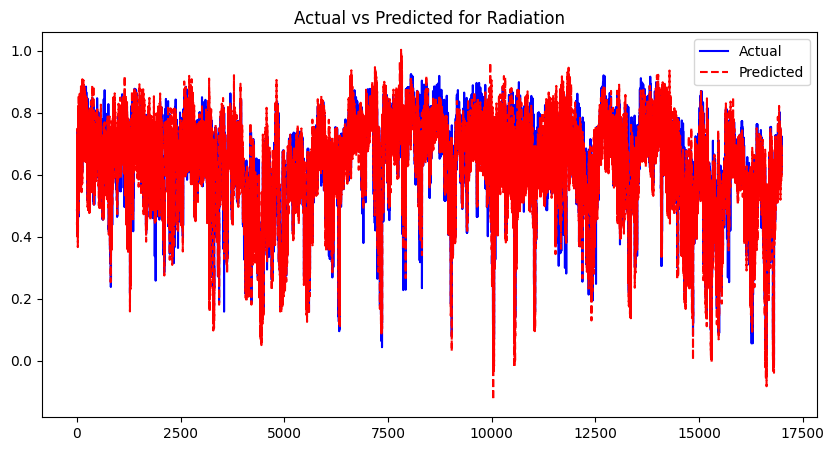

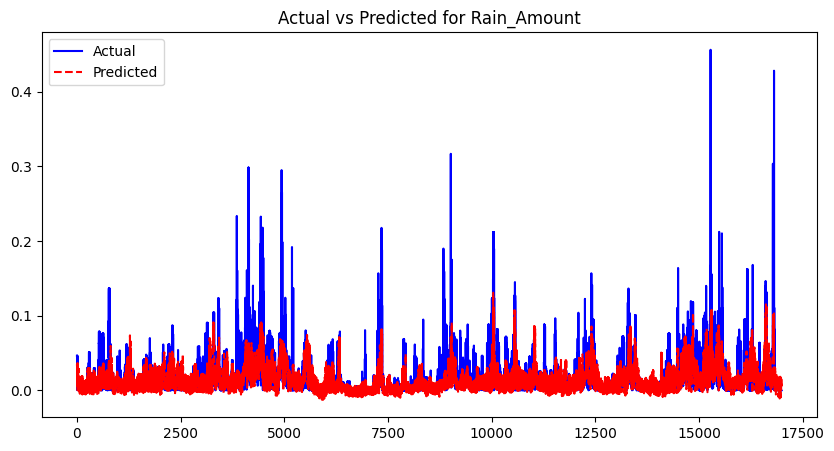

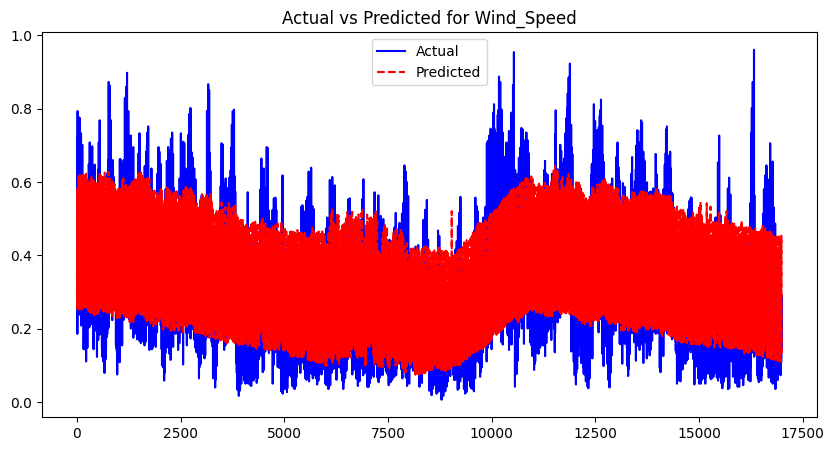

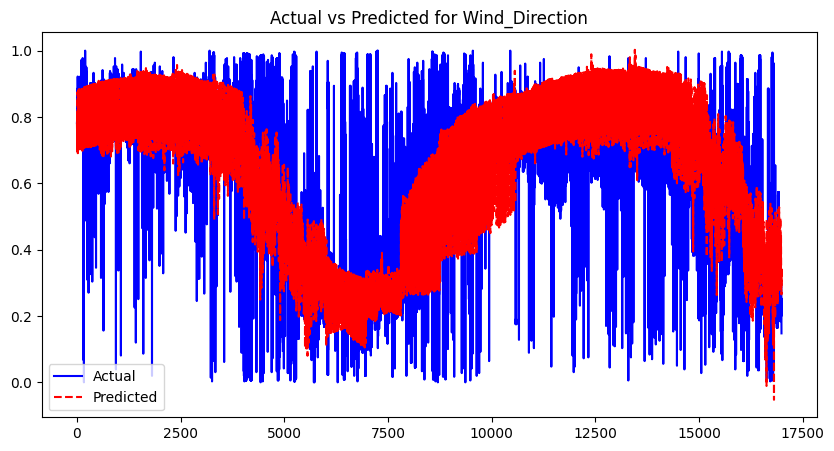

In [67]:
import matplotlib.pyplot as plt

# Plot results for each target variable
for i, col in enumerate(target_cols):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_original[:, i], label="Actual", color="blue")
    plt.plot(y_pred_original[:, i], label="Predicted", linestyle="dashed", color="red")
    plt.title(f"Actual vs Predicted for {col}")
    plt.legend()
    plt.show()


# R sqr is (-) lets try tune hyperp

In [42]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [69]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to build the model
def build_model(hp):
    model = Sequential()
    
    # LSTM Layer with tunable units
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),
                   activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Dropout Layer (prevents overfitting)
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Dense Output Layer
    model.add(Dense(1))
    
    # Compile Model with tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='mae')

    return model


In [70]:
# Define the tuner (Random Search for efficiency)
tuner = kt.RandomSearch(
    build_model, 
    objective='val_loss',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='lstm_tuning'
)

# Start Hyperparameter Tuning
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Units: {best_hps.get('units')}")
print(f"Best Dropout: {best_hps.get('dropout')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")


# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


Reloading Tuner from hyperparam_tuning/lstm_tuning/tuner0.json
Best Units: 32
Best Dropout: 0.1
Best Learning Rate: 0.001
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3183 - val_loss: 0.2905
Epoch 2/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2952 - val_loss: 0.2900
Epoch 3/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2928 - val_loss: 0.2880
Epoch 4/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2924 - val_loss: 0.2871
Epoch 5/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2908 - val_loss: 0.2862
Epoch 6/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2906 - val_loss: 0.2855
Epoch 7/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2903 - val_loss: 0.2860
Epoch 8/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2897 - val_loss: 0.2861
Epoch 9/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2889 - val_loss: 0.2845
Epoch 10/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2893 - val_loss: 0.2842
Epoch 11/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2884 - val_loss: 0.2850
Epoch 12/100
2124/2124 ━━━━━━━━

In [ ]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# Calculate R² Score
r2 = r2_score(y_test_original, y_pred_original)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")



Mean Absolute Error (MAE): 0.06942902114479503
Root Mean Squared Error (RMSE): 0.14184035456601302
R² Score: 0.5790772570094452


In [74]:
y_pred = model.predict(X_test)


531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


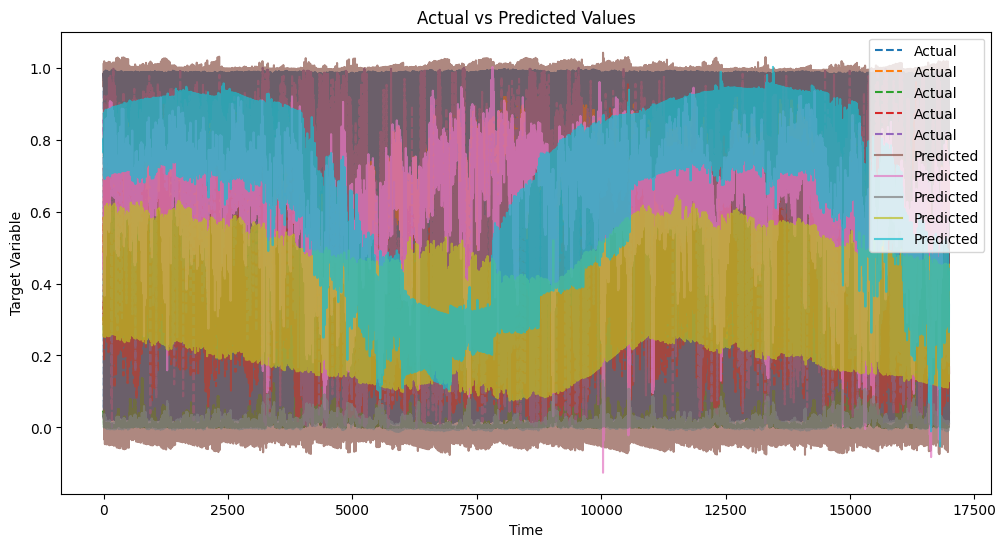

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual", linestyle='dashed')
plt.plot(y_pred_original, label="Predicted", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted Values")
plt.show()


errro distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


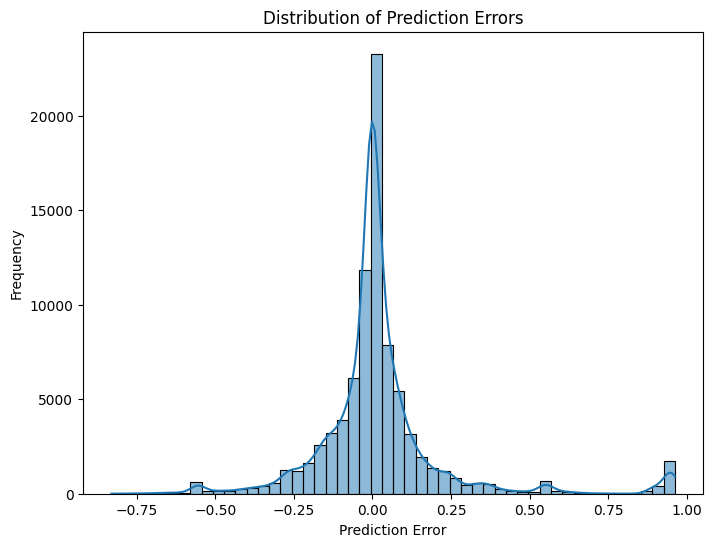

In [54]:
errors = y_test_original.flatten() - y_pred_original.flatten()

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


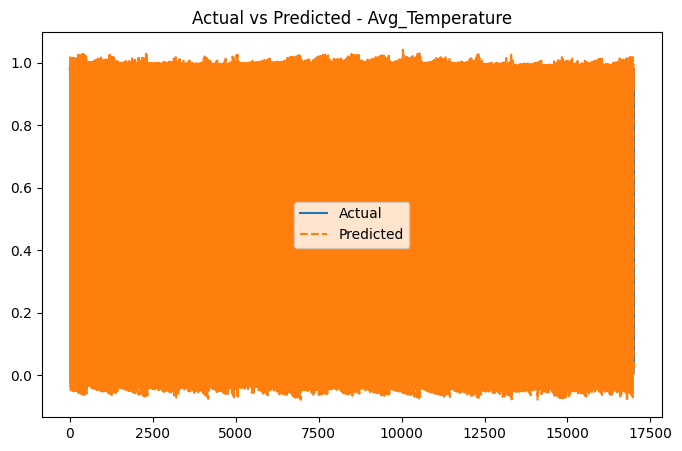

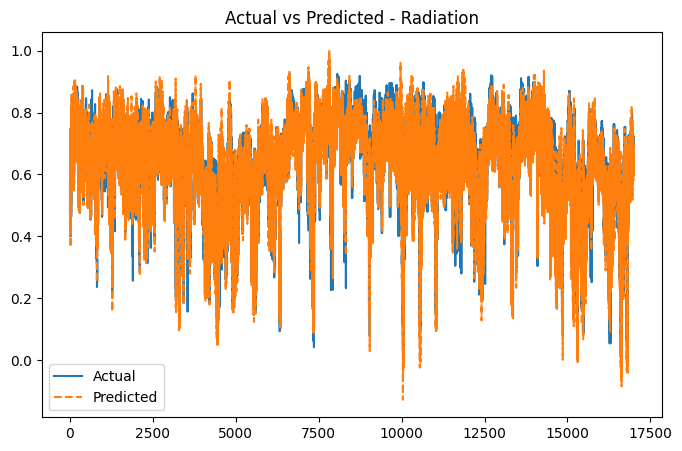

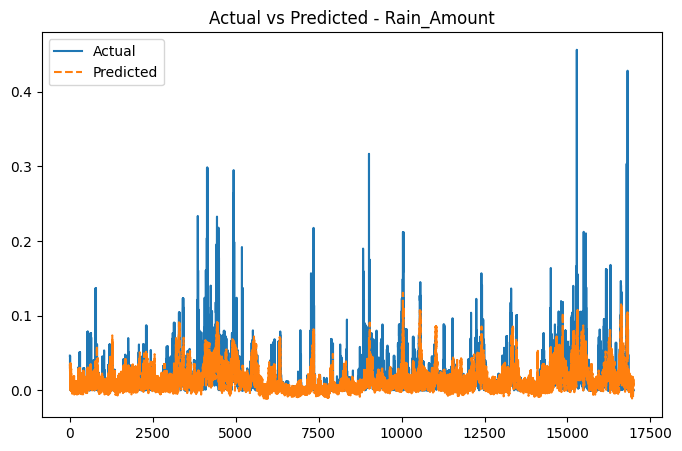

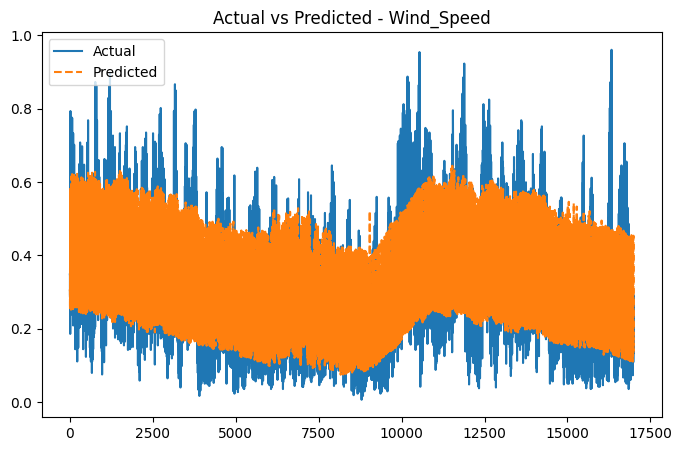

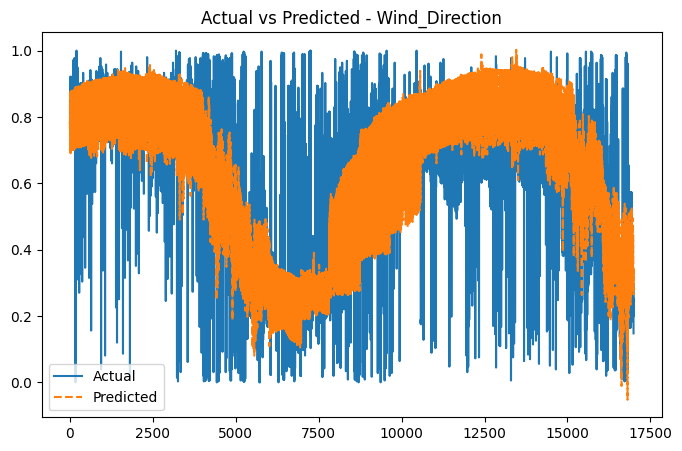

In [75]:
# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Create individual plots for each target variable
for i, var in enumerate(target_variables):
    actual = y_test[:, i]  # Get the ith column
    predicted = y_pred[:, i]  # Get the ith column
    
    plt.figure(figsize=(8, 5))
    plt.plot(actual, label="Actual", linestyle="-")
    plt.plot(predicted, label="Predicted", linestyle="--")
    plt.title(f"Actual vs Predicted - {var}")
    plt.legend()
    plt.show()
